In [2]:
import os
import numpy as np
import torch
import torchvision
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from torchvision import transforms as T

2. Task 1

In [3]:
# Download a pretrained model
model0 = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model1 = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model2 = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)
model3 = torchvision.models.detection.ssdlite320_mobilenet_v3_large(pretrained=True)

# Inference
model0.eval()
model1.eval()
model2.eval()
model3.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 125MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None

SSD(
  (backbone): SSDLiteFeatureExtractorMobileNet(
    (features): Sequential(
      (0): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (2): Hardswish()
        )
        (1): InvertedResidual(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
              (1): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (2): ReLU(inplace=True)
            )
            (1): Conv2dNormActivation(
              (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (1): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
            )
          )
        )
        (2): Invert

2. Task 2

In [4]:
# Defing PyTorch Transform
transform = T.Compose([T.ToTensor()])
# Define class names from MS-COCO dataset
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [5]:
def get_detection(img, model, threshold=0.5):
  pred = model([img]) # Pass the image to the model
  # pred is a list and each element of that list is a dictionary with keys: "labels", "scores", and "boxes"
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())] # Get the Prediction Classes
  # !!!! Complete the following
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]  # Get the Prediction Boxes
  pred_score = list(pred[0]['scores'].detach().numpy())  # Get the Prediction Scores
  pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1]        # Get list of index with score greater than threshold.
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]

  return pred_boxes, pred_class

In [6]:
def show_detections(img_path, model, threshold=0.5):
  img = Image.open(img_path) # Load the image
  img = img.convert("RGB")    # Convert image to RGB format
  img = transform(img) # Apply the transform to the image
  boxes, pred_cls = get_detection(img, model, threshold) # Get predictions
  img = cv2.imread(img_path) # Read image with cv2
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
  # !!!! Complete the following
  # write code to display the image, overlay the bounding boxes and predicted classes on top of the image
  plt.figure(figsize=(8,14)) # display the output image
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  # !!!!
  # Overlay bounding boxes and predicted classes
  ax = plt.gca()
  for i in range(len(boxes)):
    x1, y1 = boxes[i][0]
    x2, y2 = boxes[i][1]
    width = x2 - x1
    height = y2 - y1
    box = plt.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(box)
    plt.text(x1, y1, s=pred_cls[i], color='white', verticalalignment='top', bbox={'color': 'red', 'pad': 0})

  plt.show()

2. Task 3

In [7]:
!wget https://www.tejasgokhale.com/images/vehicle.png -O vehicle.jpg
# code to use show_detections to display results for `model0,model1,model2,model3`
# !!!! Complete this

--2024-05-12 18:39:46--  https://www.tejasgokhale.com/images/vehicle.png
Resolving www.tejasgokhale.com (www.tejasgokhale.com)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to www.tejasgokhale.com (www.tejasgokhale.com)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 581854 (568K) [image/png]
Saving to: ‘vehicle.jpg’

vehicle.jpg         100%[===================>] 568.22K  --.-KB/s    in 0.04s   

2024-05-12 18:39:46 (13.0 MB/s) - ‘vehicle.jpg’ saved [581854/581854]



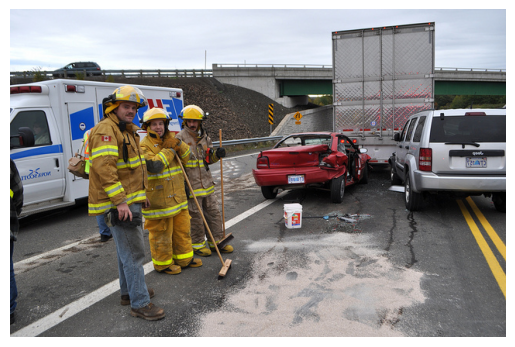

In [8]:

import cv2

# Read the image using OpenCV
img = cv2.imread("vehicle.jpg")

# Convert the image from BGR to RGB (OpenCV reads images in BGR format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes
plt.show()


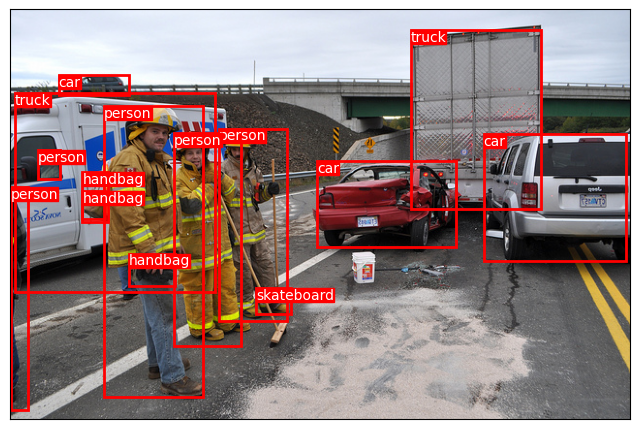

In [9]:
threshold = 0.5
img="vehicle.jpg"

show_detections(img, model0, threshold)

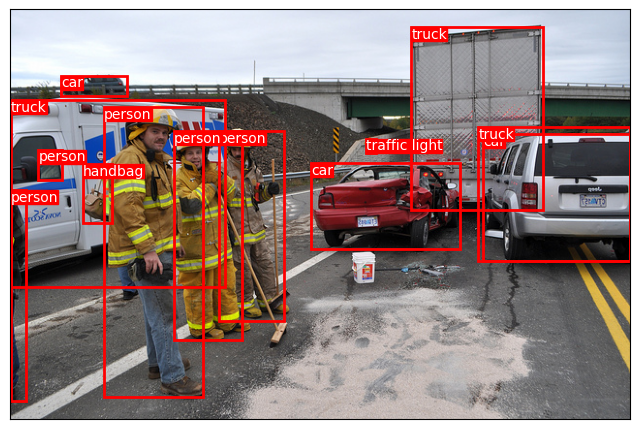

In [10]:
show_detections(img, model1, threshold)

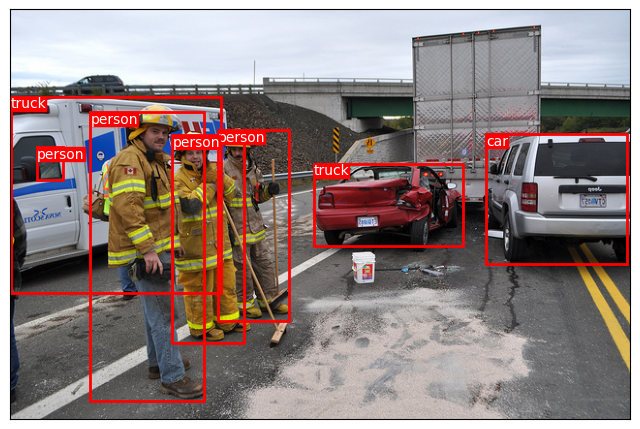

In [11]:
show_detections(img, model2, threshold)

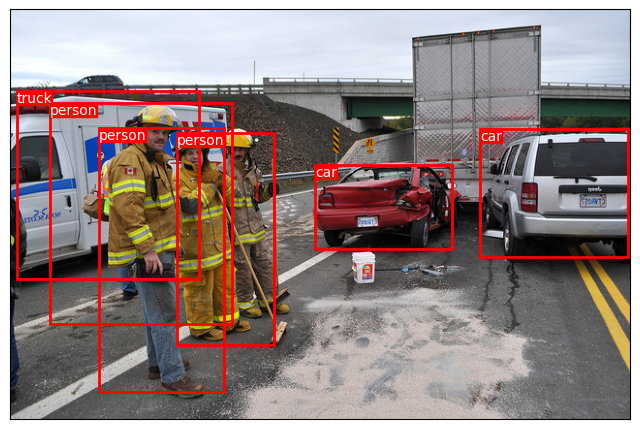

In [12]:
show_detections(img, model3, threshold)

--2024-05-12 18:40:16--  https://i.pinimg.com/originals/4d/0c/fd/4d0cfdaf8f5c02e12eec459cd1de2567.jpg
Resolving i.pinimg.com (i.pinimg.com)... 146.75.32.84, 2600:1408:9000::17c9:1fb9, 2600:1408:9000::172d:b4c2, ...
Connecting to i.pinimg.com (i.pinimg.com)|146.75.32.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82569 (81K) [image/jpeg]
Saving to: ‘v.jpg’

v.jpg               100%[===================>]  80.63K  --.-KB/s    in 0.02s   

2024-05-12 18:40:16 (4.88 MB/s) - ‘v.jpg’ saved [82569/82569]



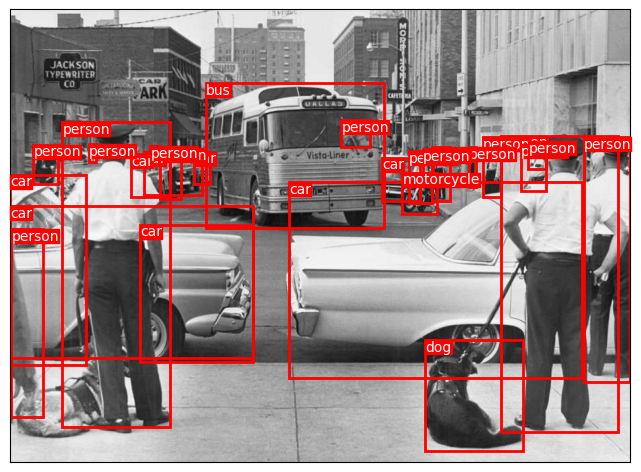

In [13]:
!wget https://i.pinimg.com/originals/4d/0c/fd/4d0cfdaf8f5c02e12eec459cd1de2567.jpg -O v.jpg
img="v.jpg"
show_detections(img, model0, threshold)

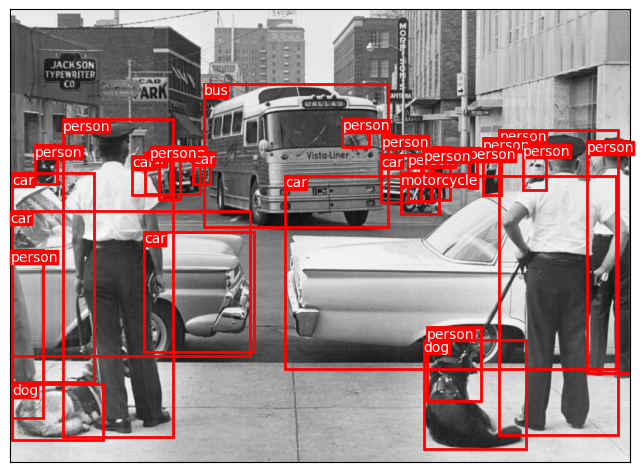

In [14]:
show_detections(img, model1, threshold)

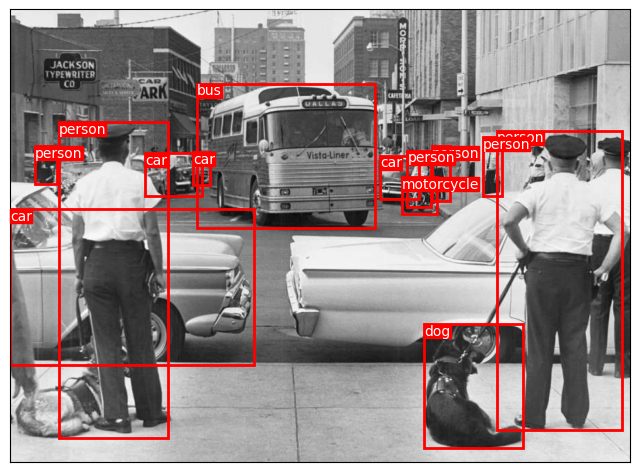

In [15]:
show_detections(img, model2, threshold)

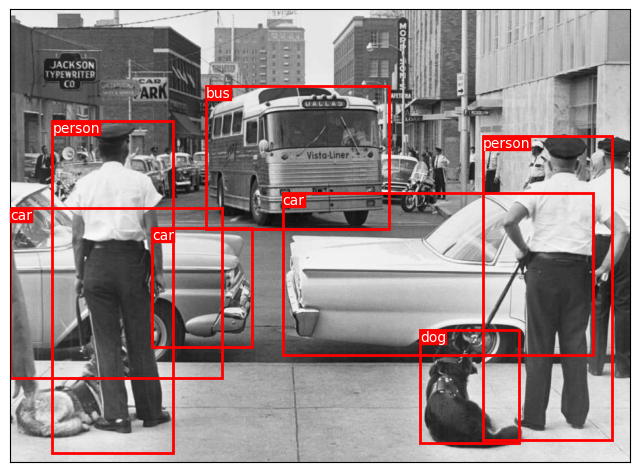

In [16]:
show_detections(img, model3, threshold)

2. Task 4

In [17]:
!wget http://images.cocodataset.org/zips/val2017.zip -O coco_val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -O coco_ann2017.zip

--2024-05-12 18:40:44--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.25.193, 3.5.6.134, 52.217.229.185, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.25.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘coco_val2017.zip’

coco_val2017.zip    100%[===================>] 777.80M   126MB/s    in 8.1s    

2024-05-12 18:40:53 (95.7 MB/s) - ‘coco_val2017.zip’ saved [815585330/815585330]

--2024-05-12 18:40:53--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.194.49, 52.216.33.1, 52.217.199.121, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.194.49|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘coco_ann2017.zip’

coco_ann2017.zip    100%[====

In [18]:
from zipfile import ZipFile, BadZipFile
import os
def extract_zip_file(extract_path):
    try:
        with ZipFile(extract_path+".zip") as zfile:
            zfile.extractall(extract_path)
        # remove zipfile
        zfileTOremove=f"{extract_path}"+".zip"
        if os.path.isfile(zfileTOremove):
            os.remove(zfileTOremove)
        else:
            print("Error: %s file not found" % zfileTOremove)
    except BadZipFile as e:
        print("Error:", e)
extract_val_path = "./coco_val2017"
extract_ann_path="./coco_ann2017"
extract_zip_file(extract_val_path)
extract_zip_file(extract_ann_path)

In [19]:
from collections import defaultdict
import json
import numpy as np
class COCOParser:
    def __init__(self, anns_file, imgs_dir):
        with open(anns_file, 'r') as f:
            coco = json.load(f)

        self.annIm_dict = defaultdict(list)
        self.cat_dict = {}
        self.annId_dict = {}
        self.im_dict = {}
        self.licenses_dict = {}
        for ann in coco['annotations']:
            self.annIm_dict[ann['image_id']].append(ann)
            self.annId_dict[ann['id']]=ann
        for img in coco['images']:
            self.im_dict[img['id']] = img
        for cat in coco['categories']:
            self.cat_dict[cat['id']] = cat
        for license in coco['licenses']:
            self.licenses_dict[license['id']] = license
    def get_imgIds(self):
        return list(self.im_dict.keys())
    def get_annIds(self, im_ids):
        im_ids=im_ids if isinstance(im_ids, list) else [im_ids]
        return [ann['id'] for im_id in im_ids for ann in self.annIm_dict[im_id]]
    def load_anns(self, ann_ids):
        im_ids=ann_ids if isinstance(ann_ids, list) else [ann_ids]
        return [self.annId_dict[ann_id] for ann_id in ann_ids]
    def load_cats(self, class_ids):
        class_ids=class_ids if isinstance(class_ids, list) else [class_ids]
        return [self.cat_dict[class_id] for class_id in class_ids]
    def get_imgLicenses(self,im_ids):
        im_ids=im_ids if isinstance(im_ids, list) else [im_ids]
        lic_ids = [self.im_dict[im_id]["license"] for im_id in im_ids]
        return [self.licenses_dict[lic_id] for lic_id in lic_ids]

In [20]:
def eval_iou(pred_box, gt_box):
    #print(pred_box)
    #print(gt_box)
    pred_x, pred_y = pred_box[0]
    pred_w, pred_h = pred_box[1]
    gt_x, gt_y, gt_w, gt_h = gt_box

    # Calculate intersection coordinates
    x_i = max(pred_x, gt_x)
    y_i = max(pred_y, gt_y)
    w_i = max(0, min(pred_x + pred_w, gt_x + gt_w) - x_i)
    h_i = max(0, min(pred_y + pred_h, gt_y + gt_h) - y_i)

    # Calculate areas of predicted and ground-truth boxes
    area_pred = pred_w * pred_h
    area_gt = gt_w * gt_h

    # Calculate area of intersection and union
    area_intersection = w_i * h_i
    area_union = area_pred + area_gt - area_intersection

    # Calculate IoU
    iou = area_intersection / (area_union + 1e-5)
    #print(iou)
    return iou


In [21]:
def get_detection(img, model, threshold=0.5):
    # Pass the image to the model
    pred = model([img])

    # Get the Prediction Classes
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]

    # Get the Prediction Boxes, Scores, and filter based on threshold
    pred_boxes = [[float(i) for i in box] for box in list(pred[0]['boxes'].detach().numpy())]
    pred_scores = list(pred[0]['scores'].detach().numpy())
    pred_t = [pred_scores.index(x) for x in pred_scores if x > threshold]

    # Filter the boxes and classes based on the threshold
    pred_boxes = [pred_boxes[i] for i in pred_t]
    pred_boxes = [list(box) for box in pred_boxes]  # Convert tuples to lists
    pred_class = [pred_class[i] for i in pred_t]

    return pred_boxes, pred_class


In [22]:
def eval_iou(pred_box, gt_box):
    # Convert the predicted and ground-truth boxes to lists
    pred_box = list(pred_box)
    gt_box = list(gt_box)
    #print(pred_box,gt_box)
    # Calculate intersection coordinates
    x_i = max(pred_box[0], gt_box[0])
    y_i = max(pred_box[1], gt_box[1])
    w_i = max(0, min(pred_box[0] + pred_box[2], gt_box[0] + gt_box[2]) - x_i)
    h_i = max(0, min(pred_box[1] + pred_box[3], gt_box[1] + gt_box[3]) - y_i)

    # Calculate areas of predicted and ground-truth boxes
    area_pred = pred_box[2] * pred_box[3]
    area_gt = gt_box[2] * gt_box[3]

    # Calculate area of intersection and union
    area_intersection = w_i * h_i
    area_union = area_pred + area_gt - area_intersection

    # Calculate IoU
    iou = area_intersection / (area_union + 1e-5)

    return iou

In [23]:
coco_annotations_file="./coco_ann2017/annotations/instances_val2017.json"
coco_images_dir="./coco_val2017/val2017"
coco= COCOParser(coco_annotations_file, coco_images_dir)

img_ids = coco.get_imgIds()
img_ids = img_ids[:1]

iou_scores_model0 = []

for i, im in enumerate(img_ids):
    image = Image.open(f"{coco_images_dir}/{str(im).zfill(12)}.jpg")
    image = transform(image)
    pred_boxes, pred_class = get_detection(image, model0)

    iou_scores_image = []

    ann_ids = coco.get_annIds(im)
    annotations = coco.load_anns(ann_ids)
    for ann in annotations:
        gt_bbox = ann['bbox']
        gt_class_id = ann["category_id"]

        # !!!! write code that takes the ground-truth bbox and class_id and returns IoU score (intersection over union)
        # !!!! you should write it as a separate function eval_iou() and call it inside the loop
        # !!!! also calculate the meanIOU over the entire dataset of 100 images
        # !!!! report the meanIOU for all 4 models

        # Loop through predicted bounding boxes
        for pred_box, pred_cls in zip(pred_boxes, pred_class):
          # Calculate IoU
          iou = eval_iou(pred_box, gt_bbox)
          iou_scores_image.append(iou)

    # Calculate mean IoU for the image
        mean_iou_image = np.argmax(iou_scores_image)
        print(f"Mean IoU for image {i + 1}: {iou_scores_image[mean_iou_image]}")

    # Append mean IoU to the list
        iou_scores_model0.append(iou_scores_image[mean_iou_image])

# Calculate mean IoU over the entire dataset
mean_iou_model0 = np.mean(iou_scores_model0)
print(f"Mean IoU for model0: {mean_iou_model0}")

Mean IoU for image 1: 0.06628063371048752
Mean IoU for image 1: 0.376522732619547
Mean IoU for image 1: 0.376522732619547
Mean IoU for image 1: 0.376522732619547
Mean IoU for image 1: 0.376522732619547
Mean IoU for image 1: 0.376522732619547
Mean IoU for image 1: 0.376522732619547
Mean IoU for image 1: 0.376522732619547
Mean IoU for image 1: 0.376522732619547
Mean IoU for image 1: 0.376522732619547
Mean IoU for image 1: 0.376522732619547
Mean IoU for image 1: 0.376522732619547
Mean IoU for image 1: 0.376522732619547
Mean IoU for image 1: 0.376522732619547
Mean IoU for image 1: 0.376522732619547
Mean IoU for image 1: 0.376522732619547
Mean IoU for image 1: 0.376522732619547
Mean IoU for image 1: 0.376522732619547
Mean IoU for image 1: 0.376522732619547
Mean IoU for model0: 0.3601942010980175


In [24]:
'''
def get_detection(img, model, threshold=0.5):
    pred = model([img])  # Pass the image to the model

    # Extract prediction classes, boxes, and scores
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
    pred_score = list(pred[0]['scores'].detach().numpy())

    # Filter predictions based on the score threshold
    valid_indices = [i for i, score in enumerate(pred_score) if score > threshold]

    if not valid_indices:
        return [], []  # Return empty lists if no predictions meet the threshold

    # Use the last valid index to slice the lists
    last_valid_index = valid_indices[-1]
    pred_boxes = pred_boxes[:last_valid_index + 1]
    pred_class = pred_class[:last_valid_index + 1]

    return pred_boxes, pred_class
'''



coco_annotations_file="./coco_ann2017/annotations/instances_val2017.json"
coco_images_dir="./coco_val2017/val2017"
coco= COCOParser(coco_annotations_file, coco_images_dir)

img_ids = coco.get_imgIds()
img_ids = img_ids[:100]
iou_threshold=0.5

iou_scores_model0 = []
precision_scores = []
recall_scores = []

for i, im in enumerate(img_ids):
    image = Image.open(f"{coco_images_dir}/{str(im).zfill(12)}.jpg")
    image = transform(image)
    pred_boxes, pred_class = get_detection(image, model0)

    ann_ids = coco.get_annIds(im)
    annotations = coco.load_anns(ann_ids)

    tp, fp, fn = 0, 0, 0
    iou_scores_image = []

    for ann in annotations:
        gt_bbox = ann['bbox']
        gt_class_id = ann["category_id"]

        # Calculate IoU score for each ground-truth box and its corresponding predicted box
        max_iou = 0
        for pred_box, pred_cls in zip(pred_boxes, pred_class):
          # Calculate IoU
          iou = eval_iou(pred_box, gt_bbox)
          iou_scores_image.append(iou)
    # Calculate mean IoU for the image
        mean_iou_image = np.argmax(iou_scores_image)
        #print(f"Mean IoU for image {i + 1}: {iou_scores_image[mean_iou_image]}")

    # Append mean IoU to the list
        iou_scores_model0.append(iou_scores_image[mean_iou_image])

        # Determine True Positives (TP), False Positives (FP), and False Negatives (FN)
        if iou_scores_image[mean_iou_image] >= iou_threshold:
            tp += 1
        else:
            fn += 1

    # Calculate False Positives (FP)
    fp = len(pred_boxes) - tp
    #print(tp,fn,fp)
    # Calculate precision and recall for the image
    precision_image = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall_image = tp / (tp + fn) if (tp + fn) > 0 else 0

    # Append precision and recall to their respective lists
    precision_scores.append(precision_image)
    recall_scores.append(recall_image)

    # Calculate mean IoU for the image and append to the list
    mean_iou_image = np.mean(iou_scores_image)
    iou_scores_model0.append(mean_iou_image)

# Calculate mean IoU, precision, and recall over the entire dataset
mean_iou_model0 = np.nanmean(iou_scores_model0)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)

print(f"Mean IoU for model0: {mean_iou_model0}")
print(f"Mean Precision for model0: {mean_precision}")
print(f"Mean Recall for model0: {mean_recall}")


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Mean IoU for model0: 0.3824964032292413
Mean Precision for model0: 0.28058503332416374
Mean Recall for model0: 0.36738095238095236


In [25]:
coco_annotations_file="./coco_ann2017/annotations/instances_val2017.json"
coco_images_dir="./coco_val2017/val2017"
coco= COCOParser(coco_annotations_file, coco_images_dir)

img_ids = coco.get_imgIds()
img_ids = img_ids[:100]
iou_threshold=0.5

iou_scores_model0 = []
precision_scores = []
recall_scores = []

for i, im in enumerate(img_ids):
    image = Image.open(f"{coco_images_dir}/{str(im).zfill(12)}.jpg")
    image = transform(image)
    pred_boxes, pred_class = get_detection(image, model1)

    ann_ids = coco.get_annIds(im)
    annotations = coco.load_anns(ann_ids)

    tp, fp, fn = 0, 0, 0
    iou_scores_image = []

    for ann in annotations:
        gt_bbox = ann['bbox']
        gt_class_id = ann["category_id"]

        # Calculate IoU score for each ground-truth box and its corresponding predicted box
        max_iou = 0
        for pred_box, pred_cls in zip(pred_boxes, pred_class):
          # Calculate IoU
          iou = eval_iou(pred_box, gt_bbox)
          iou_scores_image.append(iou)
    # Calculate mean IoU for the image
        mean_iou_image = np.argmax(iou_scores_image)
        #print(f"Mean IoU for image {i + 1}: {iou_scores_image[mean_iou_image]}")

    # Append mean IoU to the list
        iou_scores_model0.append(iou_scores_image[mean_iou_image])

        # Determine True Positives (TP), False Positives (FP), and False Negatives (FN)
        if iou_scores_image[mean_iou_image] >= iou_threshold:
            tp += 1
        else:
            fn += 1

    # Calculate False Positives (FP)
    fp = len(pred_boxes) - tp
    #print(tp,fn,fp)
    # Calculate precision and recall for the image
    precision_image = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall_image = tp / (tp + fn) if (tp + fn) > 0 else 0

    # Append precision and recall to their respective lists
    precision_scores.append(precision_image)
    recall_scores.append(recall_image)

    # Calculate mean IoU for the image and append to the list
    mean_iou_image = np.mean(iou_scores_image)
    iou_scores_model0.append(mean_iou_image)

# Calculate mean IoU, precision, and recall over the entire dataset
mean_iou_model0 = np.nanmean(iou_scores_model0)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)

print(f"Mean IoU for model1: {mean_iou_model0}")
print(f"Mean Precision for model1: {mean_precision}")
print(f"Mean Recall for model1: {mean_recall}")

Mean IoU for model1: 0.3963833513268418
Mean Precision for model1: 0.2829211714623283
Mean Recall for model1: 0.3798809523809523


In [29]:
coco_annotations_file="./coco_ann2017/annotations/instances_val2017.json"
coco_images_dir="./coco_val2017/val2017"
coco= COCOParser(coco_annotations_file, coco_images_dir)

img_ids = coco.get_imgIds()
img_ids = img_ids[:100]
iou_threshold=0.5

iou_scores_model0 = []
precision_scores = []
recall_scores = []

for i, im in enumerate(img_ids):
    image = Image.open(f"{coco_images_dir}/{str(im).zfill(12)}.jpg")
    image = transform(image)
    pred_boxes, pred_class = get_detection(image, model2)

    ann_ids = coco.get_annIds(im)
    annotations = coco.load_anns(ann_ids)

    tp, fp, fn = 0, 0, 0
    iou_scores_image = []

    for ann in annotations:
        gt_bbox = ann['bbox']
        gt_class_id = ann["category_id"]

        # Calculate IoU score for each ground-truth box and its corresponding predicted box
        max_iou = 0
        for pred_box, pred_cls in zip(pred_boxes, pred_class):
          # Calculate IoU
          iou = eval_iou(pred_box, gt_bbox)
          iou_scores_image.append(iou)
    # Calculate mean IoU for the image
        #mean_iou_image = np.argmax(iou_scores_image)
        if iou_scores_image:
          #best_iou_index = np.argmax(iou_scores_image)
          #mean_iou_image = iou_scores_image[best_iou_index]
          mean_iou_image = np.argmax(iou_scores_image)
          iou_scores_model0.append(iou_scores_image[mean_iou_image])
          if iou_scores_image[mean_iou_image] >= iou_threshold:
            tp += 1
          else:
            fn += 1
        else:
          mean_iou_image = np.nan  # Handle empty IoU scores by setting it to NaN
          iou_scores_model0.append(mean_iou_image)

        #print(f"Mean IoU for image {i + 1}: {iou_scores_image[mean_iou_image]}")

    # Append mean IoU to the list
        #iou_scores_model0.append(iou_scores_image[mean_iou_image])

        # Determine True Positives (TP), False Positives (FP), and False Negatives (FN)


    # Calculate False Positives (FP)
    fp = len(pred_boxes) - tp
    #print(tp,fn,fp)
    # Calculate precision and recall for the image
    precision_image = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall_image = tp / (tp + fn) if (tp + fn) > 0 else 0

    # Append precision and recall to their respective lists
    precision_scores.append(precision_image)
    recall_scores.append(recall_image)

    # Calculate mean IoU for the image and append to the list
    mean_iou_image = np.mean(iou_scores_image)
    iou_scores_model0.append(mean_iou_image)

# Calculate mean IoU, precision, and recall over the entire dataset
mean_iou_model0 = np.nanmean(iou_scores_model0)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)

print(f"Mean IoU for model2: {mean_iou_model0}")
print(f"Mean Precision for model2: {mean_precision}")
print(f"Mean Recall for model2: {mean_recall}")

Mean IoU for model2: 0.3599976840119967
Mean Precision for model2: 0.42337254901960786
Mean Recall for model2: 0.3216428571428572


In [30]:
coco_annotations_file="./coco_ann2017/annotations/instances_val2017.json"
coco_images_dir="./coco_val2017/val2017"
coco= COCOParser(coco_annotations_file, coco_images_dir)

img_ids = coco.get_imgIds()
img_ids = img_ids[:100]
iou_threshold=0.5

iou_scores_model0 = []
precision_scores = []
recall_scores = []

for i, im in enumerate(img_ids):
    image = Image.open(f"{coco_images_dir}/{str(im).zfill(12)}.jpg")
    image = transform(image)
    pred_boxes, pred_class = get_detection(image, model3)

    ann_ids = coco.get_annIds(im)
    annotations = coco.load_anns(ann_ids)

    tp, fp, fn = 0, 0, 0
    iou_scores_image = []

    for ann in annotations:
        gt_bbox = ann['bbox']
        gt_class_id = ann["category_id"]

        # Calculate IoU score for each ground-truth box and its corresponding predicted box
        max_iou = 0
        for pred_box, pred_cls in zip(pred_boxes, pred_class):
          # Calculate IoU
          iou = eval_iou(pred_box, gt_bbox)
          iou_scores_image.append(iou)
    # Calculate mean IoU for the image
        #mean_iou_image = np.argmax(iou_scores_image)
        #print(f"Mean IoU for image {i + 1}: {iou_scores_image[mean_iou_image]}")
        if iou_scores_image:
          #best_iou_index = np.argmax(iou_scores_image)
          #mean_iou_image = iou_scores_image[best_iou_index]
          mean_iou_image = np.argmax(iou_scores_image)
          iou_scores_model0.append(iou_scores_image[mean_iou_image])
          if iou_scores_image[mean_iou_image] >= iou_threshold:
            tp += 1
          else:
            fn += 1
        else:
          mean_iou_image = np.nan  # Handle empty IoU scores by setting it to NaN
          iou_scores_model0.append(mean_iou_image)

    # Append mean IoU to the list
        #iou_scores_model0.append(iou_scores_image[mean_iou_image])


    # Calculate False Positives (FP)
    fp = len(pred_boxes) - tp
    #print(tp,fn,fp)
    # Calculate precision and recall for the image
    precision_image = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall_image = tp / (tp + fn) if (tp + fn) > 0 else 0

    # Append precision and recall to their respective lists
    precision_scores.append(precision_image)
    recall_scores.append(recall_image)

    # Calculate mean IoU for the image and append to the list
    mean_iou_image = np.mean(iou_scores_image)
    iou_scores_model0.append(mean_iou_image)

# Calculate mean IoU, precision, and recall over the entire dataset
mean_iou_model0 = np.nanmean(iou_scores_model0)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)

print(f"Mean IoU for model3: {mean_iou_model0}")
print(f"Mean Precision for model3: {mean_precision}")
print(f"Mean Recall for model3: {mean_recall}")

Mean IoU for model3: 0.3249436235323119
Mean Precision for model3: 0.7909999999999999
Mean Recall for model3: 0.2923571428571429


In [31]:
#mean_iou_model0 = np.nanmean(iou_scores_model0)
#print(mean_iou_model0)

In [32]:

#print(f"Precision for model0: {precision}")
#print(f"Recall for model0: {recall}")